# Chapter 9: How to Use KNN Imputation

## What is KNN Imputation?
KNN Imputation replaces missing values by:
- Finding the **k nearest rows** (neighbors) in the dataset (using distance).
- Using their values to estimate the missing ones (by average).
- Works well for **numeric** features and considers data structure better than mean/median.

## -- What will you learn in this chapter?
    
    Fill in missing values ​​with KNNImputer.

    Keep imputation inside the pipeline, so that data leakage does not occur during model validation.

    Try different k values ​​(e.g. 3, 5, 7...) and find out which one is best.

    Finally, predict new records using the imputed data.

---

## Dataset Used: Horse Colic Dataset
- Same medical dataset used in Chapter 8.
- Contains many missing values marked with `"?"` → converted to `NaN`.
- Predicting a **binary classification target** (e.g. surgery needed or not).

---

## How It Works
- Uses **`KNNImputer`** from `sklearn.impute`.
- Default settings:
  - `n_neighbors=5`
  - `weights='uniform'` (equal contribution from neighbors)
  - `metric='nan_euclidean'`
- Missing values are imputed based on closest rows.

---

## Evaluation and Comparison
- Built a pipeline: `KNNImputer` → `RandomForestClassifier`.
- Evaluated using **Repeated Stratified K-Fold Cross-Validation**.
- Tested different values of `k` (1 to 21) to find the best performance.
- Found **k = 5 or 15** gave the best results (around **86.9% accuracy**).

---

## Final Prediction
- Fitted the full pipeline on all data.
- Predicted the class of a new row **with missing values**.
- Imputer handled missing values internally before prediction.

---

## Key Takeaways
- KNN Imputation uses similarity to estimate missing values.
- Performs better than simple methods for many datasets.
- Always use it **within a pipeline** to avoid data leakage.
- Try different `k` values — no one-size-fits-all!



#### 1.summarize the horse colic dataset

In [80]:
from pandas import read_csv

# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')

# summarize the first few rows
print(dataframe.head())


# summarize the number of rows with missing values for each column
for i in range(dataframe.shape[1]):
    # count number of rows with missing values
    n_miss = dataframe[[i]].isnull().sum().iloc[0]
    perc = n_miss / dataframe.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]
> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, M

#### 2- Nearest Neighbor Imputation with KNNImputer

##### 2.1- KNN Imputer Data Transform

In [83]:
# knn imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

dataframe = read_csv('horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# summarize total missing
print('Missing: %d' % sum(isnan(X).flatten()))

# define imputer
imputer = KNNImputer()

# fit on the dataset
imputer.fit(X)

# transform the dataset
Xtrans = imputer.transform(X)

# summarize total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


##### 2.2- KNN Imputer and Model Evaluation

In [85]:
# evaluate knn imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

dataframe = read_csv('horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# define modeling pipeline
model = RandomForestClassifier()
imputer = KNNImputer() #default k value is 5
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

# define model evaluation
cv = KFold(n_splits=10)

# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv)
print('Mean Accuracy:', (mean(scores)*100))

Mean Accuracy: 86.00000000000001


##### 2.3- KNN Imputer and Different Number of Neighbors

1 86.66666666666669
3 87.33333333333334
5 85.66666666666669
7 85.33333333333334
9 87.00000000000001
11 86.33333333333336
15 85.66666666666667
17 87.00000000000001
19 85.66666666666669
21 85.66666666666669


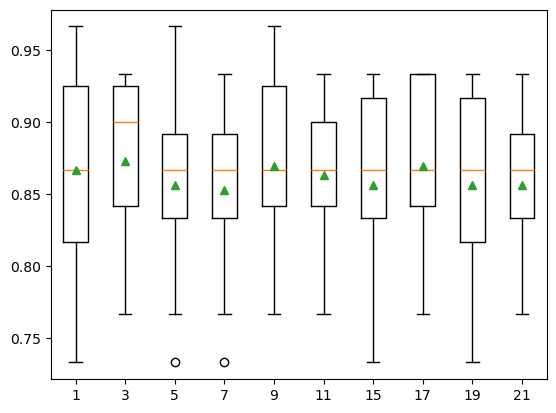

In [87]:
# compare knn imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

dataframe = read_csv('horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,7,9,11, 15,17, 19,21]]
for s in strategies:
   
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
    # evaluate the model
    cv = KFold(n_splits=10)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv)
    # store results
    results.append(scores)
    print(s, mean(scores)*100)

# plot model performance for comparison
pyplot.boxplot(results, tick_labels=strategies, showmeans=True)
pyplot.show()

##### 2.4- KNN Imputer Transform When Making a Prediction example

In [89]:
# knn imputation strategy and prediction for the horse colic dataset
from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

dataframe = read_csv('horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# create the modeling pipeline
pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=21)), ('m',RandomForestClassifier())])

# fit the model
pipeline.fit(X, y)

Pipeline(steps=[('i', KNNImputer(n_neighbors=21)),
                ('m', RandomForestClassifier())])

In [90]:
# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00,8.40, nan, nan, 2, 11300, 00000, 00000, 2]

# make a prediction
yhat = pipeline.predict([row])

# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


In [91]:
# define new data
row = [2, 1, 530101, 38.50, nan, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00, 8.40, nan, nan, 2, nan, nan, nan, nan]

# make a prediction
yhat = pipeline.predict([row])

# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


In [92]:
# define new data
row = [nan, 1, 530101, 38.50, nan, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00, 8.40, nan, nan, 2, 11300, 00000, 00000, 2]

# make a prediction
yhat = pipeline.predict([row])

# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


In [93]:
# define new data
row = [nan, 1, nan, 38.50, nan, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, nan, 45.00, 8.40, nan, nan, 2, 11300, nan, 00000, nan]

# make a prediction
yhat = pipeline.predict([row])

# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1
